In [1]:
# --> Import various Julia packages.
using LinearAlgebra
using Plots; pyplot()

Plots.PyPlotBackend()

# Iterated Function System

Iterated Function Systems (IFS) were introduced in 1981 as a method of constructing self-similar fractals, i.e. a fractal object made up of the union of several exact copies of itself, each copy being transformed by a function. The functions involved are contractive, meaning they bring points closer together and make shapes smaller. The shape of an IFS fractal is thus made up of several possibly-overlapping smaller copies of itself, each of which is also made up of copies of itself, ad infinitum

Below are four examples of IFS, namely:
- Sierpinski Triangle : it is THE canonical example of a self-similar fractal created by IFS involving only three affine transformations.
- Sierpinski Carpet : Same as the previous, except we now have a unit square as the reference. This example illustrate how to include even more transformations (i.e. a total of eight different transformations).
- Barnsley fern : name after Michael Barnsley who first described it in his book *Fractals Everyhere*. It resembles the black spleewort *Asplenium adiantum-nigrum*. The corresponding IFS involves only four different affine transformations.
- Maple leaf : a slight modification of the previous IFS which gives rise to a maple leaf structure.
- Two addtional surprises.

## Sierpinski Triangle

This fractal is named after the Polish mathematician [Waclaw Sierpinski](https://en.wikipedia.org/wiki/Wac%C5%82aw_Sierpi%C5%84ski) although it appeared as a decorative pattern centuries before his work. It is also known as the Sierpinski gasket or the Sierpinski sieve. Over the years, several different methods ([chaos game](https://en.wikipedia.org/wiki/Chaos_game), [Rule 90 cellular automaton](https://en.wikipedia.org/wiki/Rule_90), etc) have been discovered to generate this particular fractal object.

<br>
 
![Image Test](Sierpinski_triangle_evolution.png)
<br>
**Figure:** Generation of the Sierpinski gasket using an IFS. From [Wikipedia](https://en.wikipedia.org/wiki/Sierpinski_triangle).
<br>

Let us now use the figure above to come up with the rules giving rise to the Sierpinski triangle. Starting from an equilateral triangle, proceed as follows:
1. Shrink the triangle by a factor 2. Make three copies and position the three shrunken triangles so that each one touches the other two at a corner (see the second image).
2. Repeat step 1 with each of the smaller triangles (see image 3 and so on).

As you can see, these two extremely simple rules give rise to a particularly intriguing fractal object. The three transformations involved in step 1 can be described mathematically by the three affine transformations. Denoting by $(x, y)$ the coordinates of a point, the first function transforming our initial triangle into the one in the lower left corner is simply given by

$$
    f_1(x, y) =  \begin{bmatrix} \frac{1}{2} & 0 \\ 0 & \frac{1}{2} \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix}.
$$

The second function transforming the original triangle into the smaller one in the lower right corner reads

$$
    f_2(x, y) =  \begin{bmatrix} \frac{1}{2} & 0 \\ 0 & \frac{1}{2} \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} + \begin{bmatrix} \frac{1}{2}w \\ 0 \end{bmatrix},
$$

where $w$ denotes the width of the initial triangle. Finally, the transformation mapping the initial triangle into the smaller upper one is

$$
    f_3(x, y) =  \begin{bmatrix} \frac{1}{2} & 0 \\ 0 & \frac{1}{2} \end{bmatrix} \begin{bmatrix} x \\ y \end{bmatrix} + \begin{bmatrix} \frac{1}{4}w \\ \frac{1}{2}h \end{bmatrix},
$$

where $h$ denotes the height of the initial triangle. Given these three affine transformations, the IFS giving rise to the Sierpinski triangle is as follows

<div class="alert alert-block alert-info">
<b>Iterated Function System:</b> Sierpinski Triangle

<pre><code>INPUT: Starting point <b>x<sub>0</sub></b> = (0, 0), number of iterations n.</code></pre>

<pre><code>    for i = 1:n
        Pick a random number r between 0 and 1.

        if 0 < r < 1/3
            <b>x<sub>i</sub></b> = f<sub>1</sub>(<b>x<sub>i-1</sub></b>)
        else if 1/3 < r < 2/3
            <b>x<sub>i</sub></b> = f<sub>2</sub>(<b>x<sub>i-1</sub></b>)
        else
            <b>x<sub>i</sub></b> = f<sub>3</sub>(<b>x<sub>i-1</sub></b>)
        end
        
    end
</code></pre>

<pre><code>RETURN: <b>X</b> = [<b>x<sub>0</sub></b> ... <b>x<sub>n</sub></b>].</code></pre>
</div>

The following three Julia cells implement this game, play it for various numbers of iterations and plot the corresponding results.


In [2]:
function Sierpinsky_triangle(maxiter; height=√3/2, width=1)

    # --> List of transformations.
    A₁ = [ 1.0/2.0 0 ; 0 1.0/2.0 ]
    b₁ = [0 ; 0]
    
    A₂ = [1.0/2.0 0 ; 0 1.0/2.0]
    b₂ = [width/2.0 ; 0]
    
    A₃ = [1.0/2.0 0 ; 0 1.0/2.0]
    b₃ = [width/4.0 ; height/2.0]
    
    # --> Initialize array.
    x = zeros(2, maxiter)
    
    # --> Generate the Barnsley Fern.
    for i = 2:maxiter
        # --> Draw a random number.
        r = rand(1:3)

        # --> Apply randomly one of the three affine transformations.
        if r == 1
            # --> Maps to the lower left triangle.
            x[:, i] .= A₁*x[:, i-1] + b₁
        elseif r == 2
            # --> Map to the lower right triangle.
            x[:, i] .= A₂*x[:, i-1] + b₂
        else
            # --> Map to the upper triangle.
            x[:, i] .= A₃*x[:, i-1] + b₃
        end
    end
    
    # --> Plot the figure.
    p = scatter(
                x[1, :], x[2, :],
                xlim = (-0.1, 1.1*width), ylim = (-0.1, 1.1*height),
                color = :royalblue,
                aspect_ratio = :equal,
                marker = :pixel, markerstrokewidth=0,
                markersize = 1.,
                legend = :none,
                xticks = false, yticks = false, 
                framestyle = :none,
                title = "N = $(maxiter)"
    )
    
    # --> Return the figure.
    return p    
end

Sierpinsky_triangle (generic function with 1 method)

In [3]:
# --> Play the Sierpinski Chaos Game for various number of iterations.
p1 = Sierpinsky_triangle(10);
p2 = Sierpinsky_triangle(100);
p3 = Sierpinsky_triangle(1000);
p4 = Sierpinsky_triangle(10000);
p5 = Sierpinsky_triangle(100000);

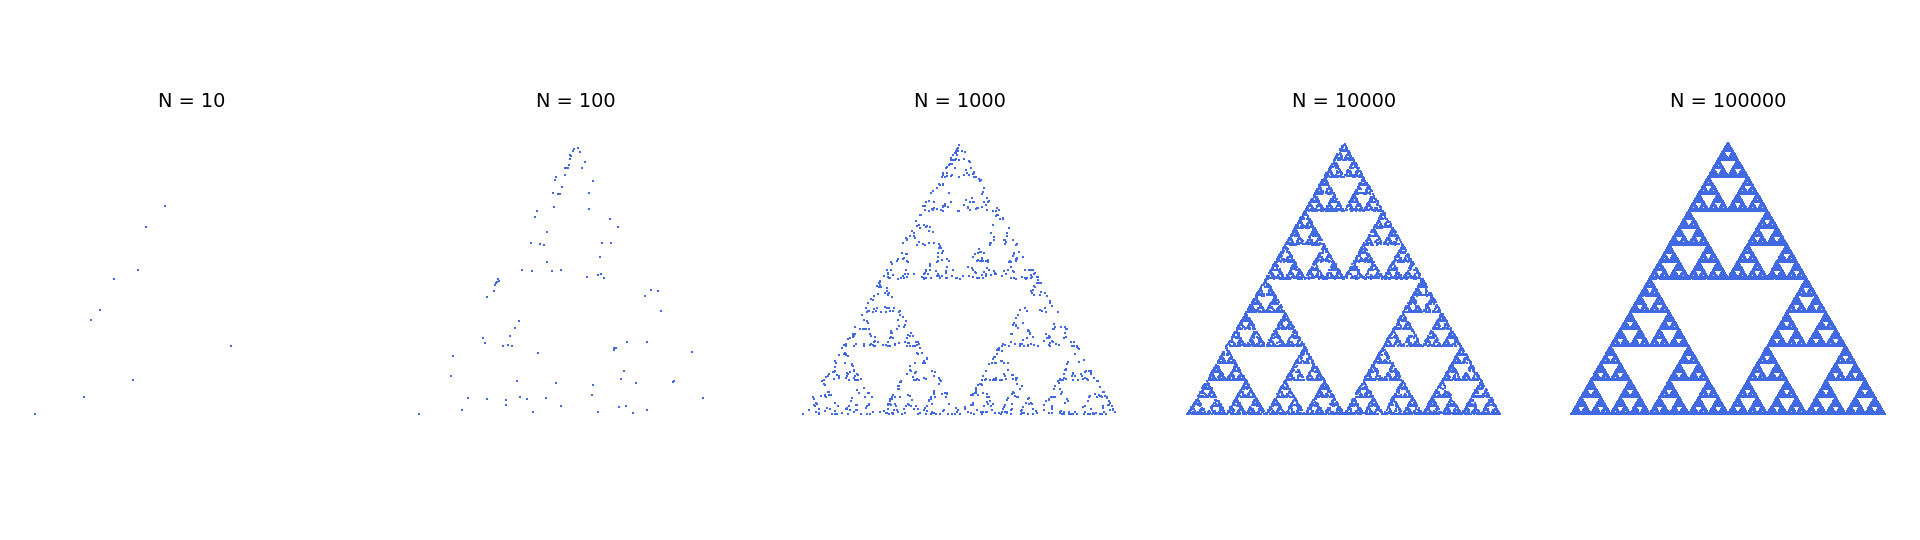

In [4]:
# --> Plot the results.
plot(
    p1, p2, p3, p4, p5,
    layout = (1, 5),
    size = (1920, 1080/2),
    )

As you can see, a faint outline is formed after playing the chaos game for 100 iterations. The core skeleton is quite visible after roughly 1000 iterations. Finally, as you increase the number of iterations to 10 000 or 100 000, the Sierpinski fractal triangle then becomes clearly obvious.

As mentionned previously, chaos game is far from being the only way to draw the Sierpinski triangle. Another example is [Rule 90 cellular automaton](https://en.wikipedia.org/wiki/Rule_90), see the figure below. Quite surprisingly, Sierpinsky-like patterns generated by Rule 90 cellular automaton can also be observed in nature, such as on the shell of the textile cone.

![Rule 90](ex_rule90.png)

<b>Figure:</b> Comparison of the Sierpinski-like pattern generated by the Rule 90 cellular automaton and the pattern observed on the shell of textile cone (venomous sea snail).

## Sierpinski Carpet

Other Sierpinski-like fractal can easily be constructed using the same process. A famous example is the so-called Sierpinski carpet illustrated on the figure below.

<br>
 
![Image Test](sierpinski_carpet_github.jpeg)

<br>
<center><b>Figure:</b> Generation of the Sierpinski carpet using an IFS.</center>
<br>

Starting from a unit square, the generating process is quite similar to that of the Sierpinski triangle discussed previously except that we now have eight different affine transformations to consider. The code below should be self-explanatory. It plays the chaos game with the eight afored mentionned affine transformations and plots the result for various numbers of iterations.

In [5]:
function Sierpinsky_carpet(maxiter)

    # --> List of transformations.
    A₁ = [ 1.0/3.0 0 ; 0 1.0/3.0 ]
    b₁ = [0 ; 0]
    
    A₂ = [ 1.0/3.0 0 ; 0 1.0/3.0 ]
    b₂ = [1.0/3.0 ; 0]
    
    A₃ = [ 1.0/3.0 0 ; 0 1.0/3.0 ]
    b₃ = [2.0/3.0 ; 0]
    
    A₄ = [1.0/3.0 0 ; 0 1.0/3.0 ]
    b₄ = [0 ; 1.0/3.0]
    
    A₅ = [ 1.0/3.0 0 ; 0 1.0/3.0 ]
    b₅ = [0 ; 2.0/3.0]
    
    A₆ = [ 1.0/3.0 0 ; 0 1.0/3.0 ]
    b₆ = [1.0/3.0 ; 2.0/3.0]
    
    A₇ = [ 1.0/3.0 0 ; 0 1.0/3.0 ]
    b₇ = [2.0/3.0 ; 1.0/3.0]
    
    A₈ = [ 1.0/3.0 0 ; 0 1.0/3.0 ]   
    b₈ = [2.0/3.0 ; 2.0/3.0]
    
    # --> Initialize array.
    x = zeros(2, maxiter)
    
    # --> Generate the Barnsley Fern.
    for i = 2:maxiter
        # --> Draw a random number.
        r = rand(1:8)

        # --> Apply randomly one of the eight affine transformations.
        if r == 1
            x[:, i] .= A₁*x[:, i-1] + b₁
        elseif r == 2
            x[:, i] .= A₂*x[:, i-1] + b₂
        elseif r == 3
            x[:, i] .= A₃*x[:, i-1] + b₃
        elseif r == 4
            x[:, i] .= A₄*x[:, i-1] + b₄
        elseif r == 5
            x[:, i] .= A₅*x[:, i-1] + b₅
        elseif r == 6
            x[:, i] .= A₆*x[:, i-1] + b₆
        elseif r == 7
            x[:, i] .= A₇*x[:, i-1] + b₇
        else
            x[:, i] = A₈*x[:, i-1] + b₈
        end
    end
    
    # --> Plot the figure.
    p = scatter(
                x[1, :], x[2, :],
                xlim = (-0.1, 1.1), ylim = (-0.1, 1.1),
                color = :royalblue,
                aspect_ratio = :equal,
                marker = :pixel, markerstrokewidth=0,
                markersize = 1.0,
                legend = :none,
                xticks = false, yticks = false, 
                framestyle = :none,
                title = "N = $(maxiter)"
    )
    
    # --> Return the figure.
    return p    
end

Sierpinsky_carpet (generic function with 1 method)

In [6]:
# --> Play the Sierpinski Chaos Game for various number of iterations.
p1 = Sierpinsky_carpet(10);
p2 = Sierpinsky_carpet(100);
p3 = Sierpinsky_carpet(1000);
p4 = Sierpinsky_carpet(10000);
p5 = Sierpinsky_carpet(100000);

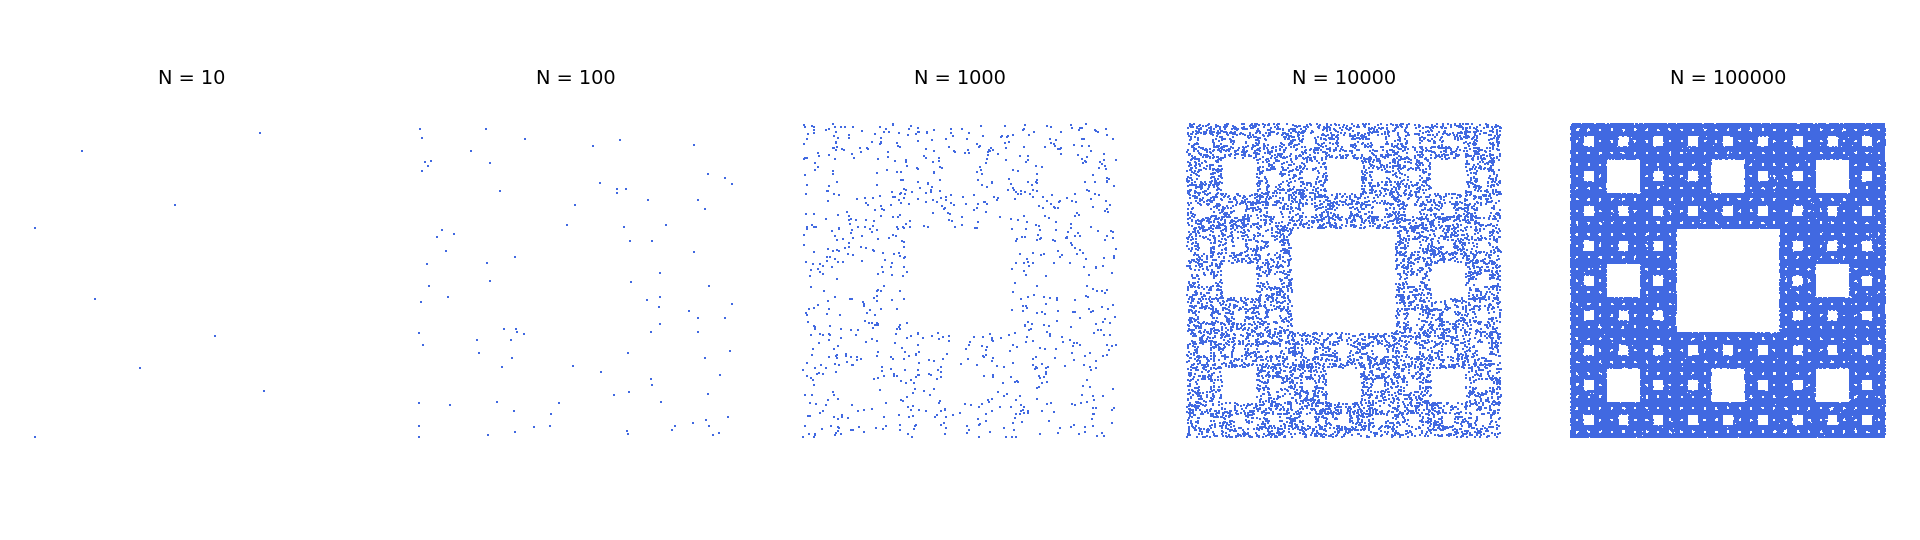

In [7]:
# --> Plot figure.
plot(
    p1, p2, p3, p4, p5,
    layout = (1, 5),
    size = (1920, 1080/2),
    )

As for the Sierpinski triangle, a faint outline is formed after playing the chaos game for 100 iterations. The core skeleton is quite visible after roughly 1000 iterations. As you increase the number of iterations to 10 000 or 100 000, the Sierpinski fractal carpet then becomes clearly visible.

Note finally that mobile phone and WiFi fractal antennas have been produced in the form of few iterations of the Sierpinski carpet. Due to their self-similarity and scale invariance, they easily accommodate multiple frequencies. They are also easy to fabricate and smaller than conventional antennas of similar performance, thus being optimal for pocket-sized mobile phones.

<br>

![Fractal Antenna](fractal_antenna.gif)
<br>
<center><b>Figure:</b> Example of a fractal antenna.</center>

## Natural fractal objects?

Iterated Function Systems can generate fractal objects significantly more complex than the simple triangle and square-based fractal objects presented so far. Below are four examples of IFS generating realistic plant-like fractal objects, namely:
- Barnsley Fern,
- Maple leaf,
- Two different types of trees.

For more details, you can look at the following references:
- Barnsley, Michael F. Fractals everywhere. Academic press, 2014. [[link]](https://books.google.fr/books/about/Fractals_Everywhere.html?id=PbMAAQAAQBAJ&printsec=frontcover&source=kp_read_button&redir_esc=y#v=onepage&q&f=false)
- Paul Bourke's website [[link]](http://paulbourke.net/fractals/)

### Barnsley Fern

In [8]:
function Barnsley_fern(maxiter)

    # --> List of transformations.
    A₁ = [0.0 0.0 ;  0.0 0.16]
    b₁ = [ 0.0 ; 0.0]

    A₂ = [0.85 0.04 ;  -0.04 0.85]
    b₂ = [ 0.0 ; 1.6]

    A₃ = [0.2 -0.26 ;  0.23 0.22]
    b₃ = [ 0.0 ; 1.6]

    A₄ = [-0.15 0.28 ;  0.26 0.24]
    b₄ = [ 0.0 ; 0.44]

    # --> Initialize array.
    x = zeros(2, maxiter)
    
    # --> Generate the Barnsley Fern.
    for i = 2:maxiter
        # --> Draw a random number.
        r = rand()*100

        if r < 1.0
            x[:, i] .= A₁*x[:, i-1] + b₁
        elseif 1.0 <= r < 86.0
            x[:, i] .= A₂*x[:, i-1] + b₂
        elseif 86.0<= r < 93.0
            x[:, i] .= A₃*x[:, i-1] + b₃
        else
            x[:, i] .= A₄*x[:, i-1] + b₄
        end
    end
    
    x = x'
    
    p = scatter(
                x[:, 2], x[:, 1],
                xlim = (-1, 10), ylim = (-3, 3), 
                color = :green,
                aspect_ratio = :equal,
                marker = :pixel, markerstrokewidth=0,
                markersize = 1.,
                legend = :none,
                xticks = false, yticks = false, 
                framestyle = :none,
                title = "N = $(maxiter)"
    )
    return p
end

Barnsley_fern (generic function with 1 method)

In [9]:
p1 = Barnsley_fern(10);
p2 = Barnsley_fern(100);
p3 = Barnsley_fern(1000);
p4 = Barnsley_fern(10000);
p5 = Barnsley_fern(100000);

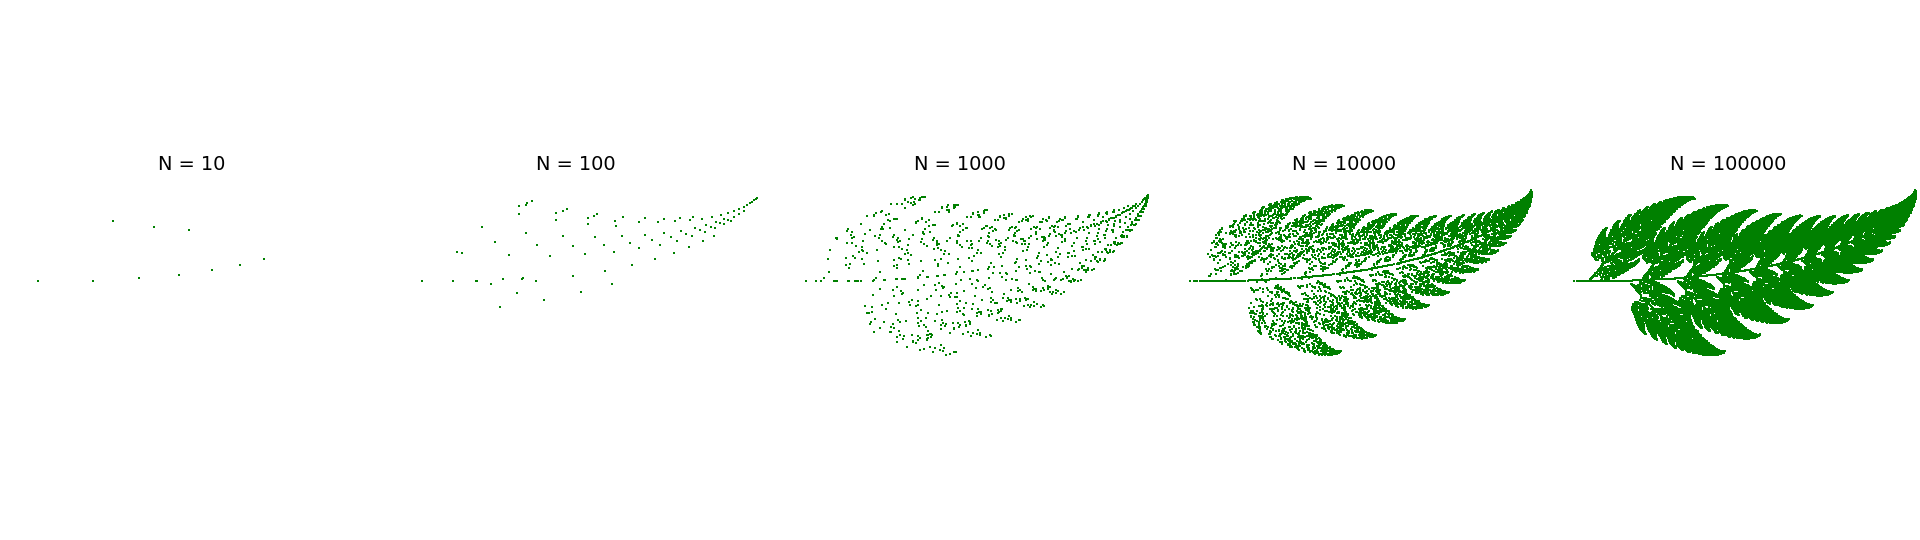

In [10]:
plot(
    p1, p2, p3, p4, p5,
    layout = (1, 5),
    size = (1920, 1080/2),
    )

## Maple Leaf

In [11]:
function Mapple_leaf(maxiter)

    # --> List of transformations.
    A₁ = [0.14 0.01 ;  0.0 0.51]
    b₁ = [ -0.08 ; -1.31]

    A₂ = [0.43 0.52 ;  -0.45 0.5]
    b₂ = [ 1.49 ; -0.75]

    A₃ = [0.45 -0.49 ;  0.47 0.47]
    b₃ = [ -1.62 ; -0.74]

    A₄ = [0.49 0.0 ;  0.0 0.51]
    b₄ = [ 0.02 ; 1.62]
    # --> Initialize array.
    x = zeros(2, maxiter)
    
    # --> Generate the Barnsley Fern.
    for i = 2:maxiter
        # --> Draw a random number.
        r = rand()*100

        if r < 10.0
            x[:, i] .= A₁*x[:, i-1] + b₁
        elseif 10.0 <= r < 45.0
            x[:, i] .= A₂*x[:, i-1] + b₂
        elseif 45.0 <= r < 80.0
            x[:, i] .= A₃*x[:, i-1] + b₃
        else
            x[:, i] .= A₄*x[:, i-1] + b₄
        end
    end

    x = x'
    
    p = scatter(
                x[:, 1], x[:, 2],
                xlim = (-4, 4), ylim = (-4, 4),
                color = :green,
                aspect_ratio = :equal,
                marker = :pixel, markerstrokewidth=0,
                markersize = 1.,
                legend = :none,
                xticks = false, yticks = false, 
                framestyle = :none,
                title = "N = $(maxiter)"
    )
    return p
end

Mapple_leaf (generic function with 1 method)

In [12]:
p1 = Mapple_leaf(100);
p2 = Mapple_leaf(1000);
p3 = Mapple_leaf(10000);
p4 = Mapple_leaf(100000);
p5 = Mapple_leaf(1000000);

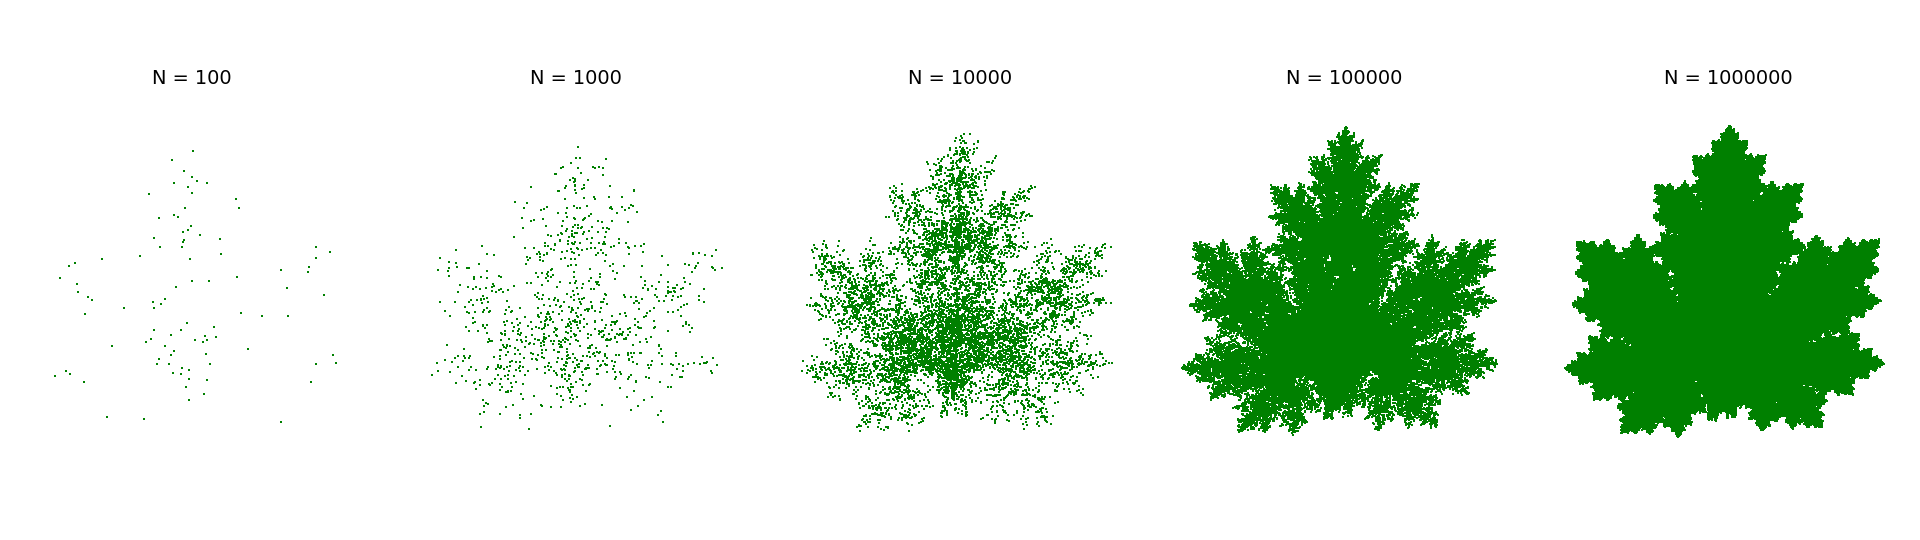

In [13]:
plot(
    p1, p2, p3, p4, p5,
    layout = (1, 5),
    size = (1920, 1080/2),
    )

### Fractal tree 

From [Paul Bourke's website](http://paulbourke.net/fractals/ifs/).

In [14]:
function fractal_tree(maxiter)
    
    # --> List of transformation.
    A₁ = [0.05*cos(0.0) -0.6*sin(0.0) ; 0.05*sin(0) 0.6*cos(0.0)]
    b₁ = [0.0 ; 0.0]

    A₂ = [0.05*cos(0.0) -0.5*sin(0.0) ; 0.05*sin(0) -0.5*cos(0.0)]
    b₂ = [0.0 ; 1.0]
    
    A₃ = [0.6*cos(0.698) -0.5*sin(0.698) ; 0.6*sin(0.698) 0.5*cos(0.698)]
    b₃ = [0.0 ; 0.6]
    
    A₄ = [0.5*cos(0.349) -0.45*sin(0.3492) ; 0.5*sin(0.349) 0.45*cos(0.3492)]
    b₄ = [0.0 ; 1.1]
    
    A₅ = [0.5*cos(-0.524) -0.55*sin(-0.524) ; 0.5*sin(-0.524) 0.55*cos(-0.524)]
    b₅ = [0.0 ; 1.0]
    
    A₆ = [0.55*cos(-0.698) -0.4*sin(-0.698) ; 0.55*sin(-0.698) 0.4*cos(-0.698)]
    b₆ = [0.0 ; 0.7]
    
    # --> Initialize array.
    x = zeros(2, maxiter)
    
    # --> Generate the Barnsley Fern.
    for i = 2:maxiter
        # --> Draw a random number.
        r = rand(1:6)

        # --> Apply randomly one of the eight affine transformations.
        if r == 6
            x[:, i] .= A₁*x[:, i-1] + b₁
        elseif r == 2
            x[:, i] .= A₂*x[:, i-1] + b₂
        elseif r == 3
            x[:, i] .= A₃*x[:, i-1] + b₃
        elseif r == 4
            x[:, i] .= A₄*x[:, i-1] + b₄
        elseif r == 5
            x[:, i] .= A₅*x[:, i-1] + b₅
        else
            x[:, i] .= A₆*x[:, i-1] + b₆
        end
    end
    
    # --> Plot the figure.
    p = scatter(
                x[1, :], x[2, :],
                xlim = (-1.1, 1.1), ylim = (0., 2.125),
                color = :black,
                aspect_ratio = :equal,
                marker = :pixel, markerstrokewidth=0,
                markersize = 1.0,
                legend = :none,
                xticks = false, yticks = false, 
                framestyle = :none,
                title = "N = $(maxiter)"
    )
    
    # --> Return the figure.
    return p    
end

fractal_tree (generic function with 1 method)

In [15]:
# --> Play the Sierpinski Chaos Game for various number of iterations.
p1 = fractal_tree(10);
p2 = fractal_tree(100);
p3 = fractal_tree(1000);
p4 = fractal_tree(10000);
p5 = fractal_tree(100000);

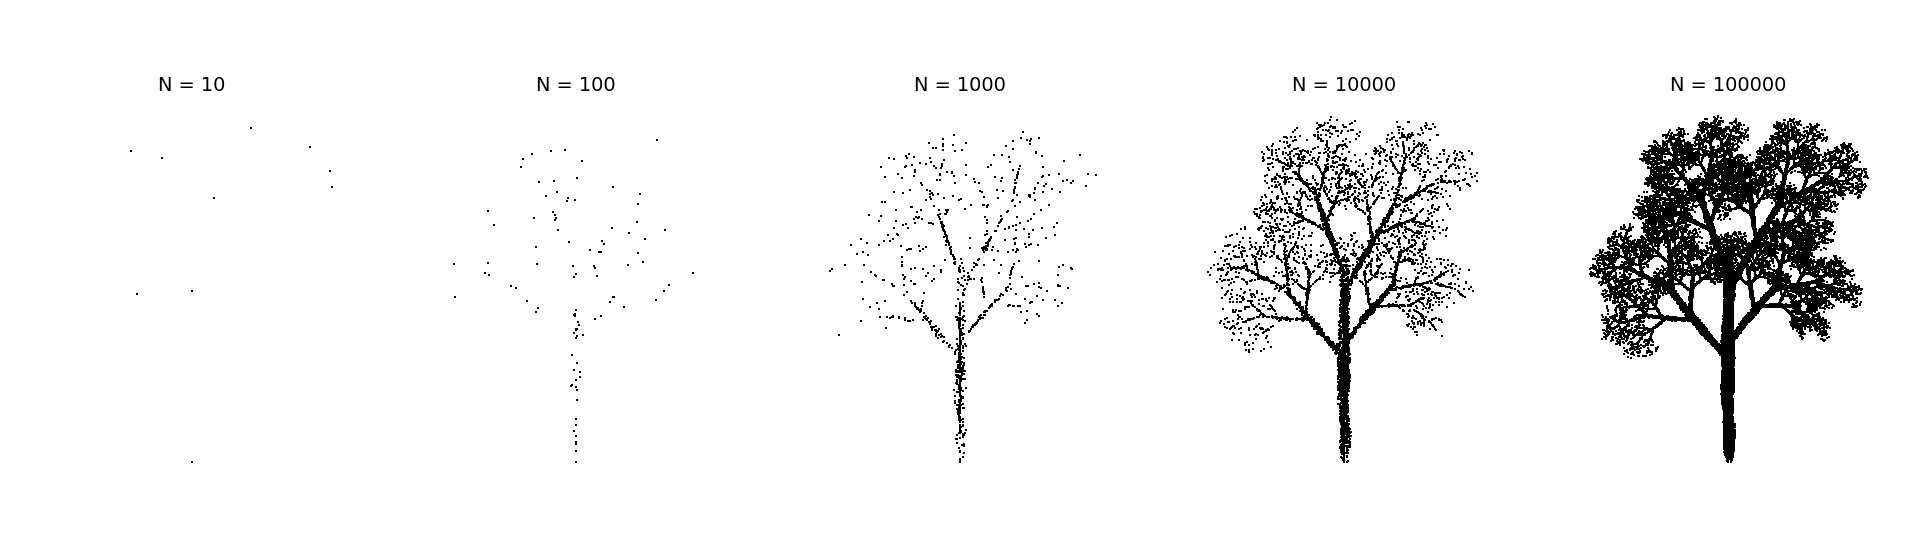

In [16]:
# --> Plot figure.
plot(
    p1, p2, p3, p4, p5,
    layout = (1, 5),
    size = (1920, 1080/2),
    )

In [17]:
function fractal_tree_bis(maxiter)
    
    # --> List of transformation.
    A₁ = [0.05 0 ; 0 0.4]
    b₁ = [-0.06 ; -0.47]

    A₂ = [-0.05 0 ; 0 -0.4]
    b₂ = [-0.06 ; -0.47]

    A₃ = [0.03 -0.14 ; 0 0.26]
    b₃ = [-0.16 ; -0.01]

    A₄ = [-0.03 0.14 ; 0 -0.26]
    b₄ = [-0.16 ; -0.01]

    A₅ = [0.56 0.44 ; -0.37 0.51]
    b₅ = [0.3 ; 0.15]

    A₆ = [0.19 0.07 ; -0.1 0.15]
    b₆ = [-0.2 ; 0.28]

    A₇ = [-0.33 -0.34 ; -0.33 0.34]
    b₇ = [-0.54 ; 0.39]
    
    # --> Initialize array.
    x = zeros(2, maxiter)
    
    # --> Generate the Barnsley Fern.
    for i = 2:maxiter
        # --> Draw a random number.
        r = rand(1:7)

        # --> Apply randomly one of the eight affine transformations.
        if r == 1
            x[:, i] .= A₁*x[:, i-1] + b₁
        elseif r == 2
            x[:, i] .= A₂*x[:, i-1] + b₂
        elseif r == 3
            x[:, i] .= A₃*x[:, i-1] + b₃
        elseif r == 4
            x[:, i] .= A₄*x[:, i-1] + b₄
        elseif r == 5
            x[:, i] .= A₅*x[:, i-1] + b₅
        elseif r == 6
            x[:, i] .= A₆*x[:, i-1] + b₆
        else
            x[:, i] .= A₇*x[:, i-1] + b₇
        end
    end
    
    # --> Plot the figure.
    p = scatter(
                x[1, :], x[2, :],
                xlim = (-1, 1), ylim = (-1, 1),
                color = :black,
                aspect_ratio = :equal,
                marker = :pixel, markerstrokewidth=0,
                markersize = 1.0,
                legend = :none,
                xticks = false, yticks = false, 
                framestyle = :none,
                title = "N = $(maxiter)"
    )
    
    # --> Return the figure.
    return p    
end

fractal_tree_bis (generic function with 1 method)

In [18]:
# --> Play the Sierpinski Chaos Game for various number of iterations.
p1 = fractal_tree_bis(10);
p2 = fractal_tree_bis(100);
p3 = fractal_tree_bis(1000);
p4 = fractal_tree_bis(10000);
p5 = fractal_tree_bis(100000);

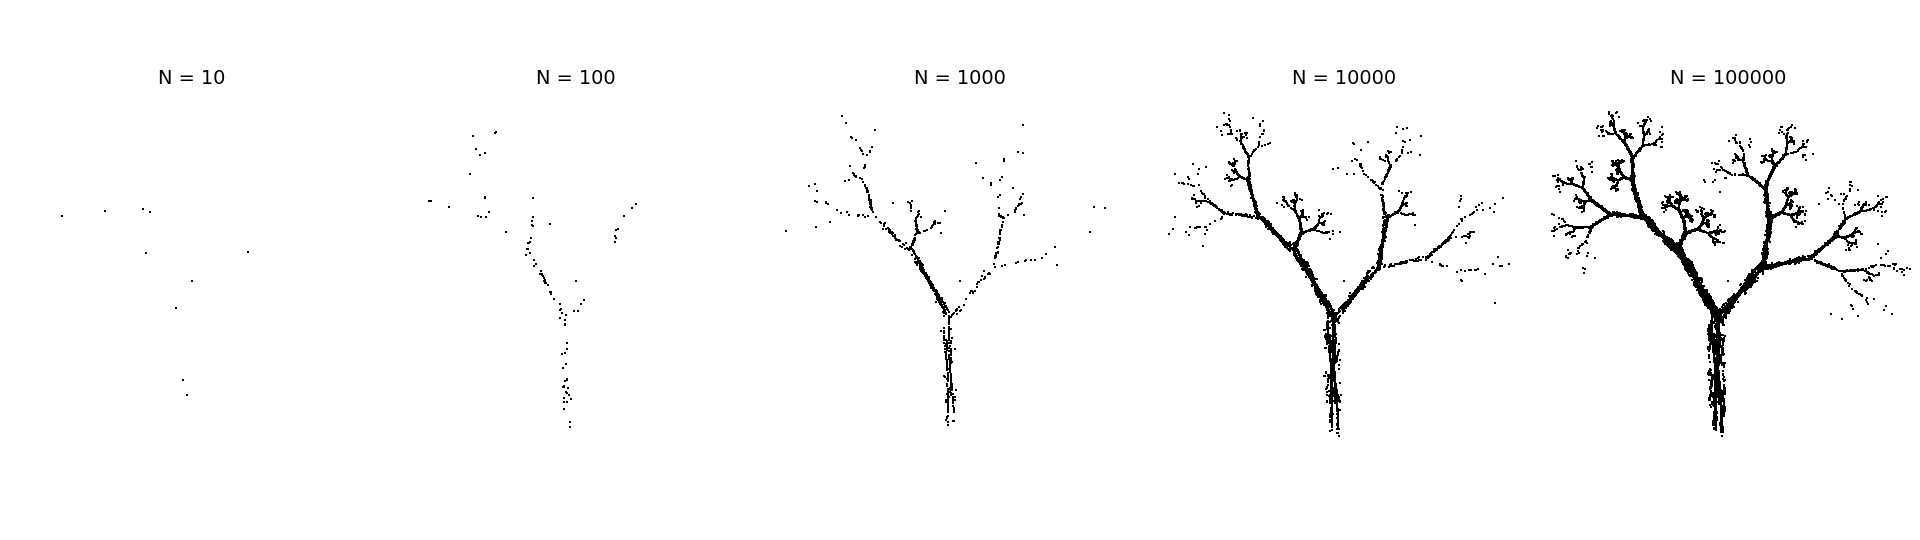

In [19]:
# --> Plot figure.
plot(
    p1, p2, p3, p4, p5,
    layout = (1, 5),
    size = (1920, 1080/2),
    )